<a href="https://colab.research.google.com/github/Xarabek/Project/blob/master/image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget #For colab

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3a692bebf7adc9041d1575fdab21ace6cebe42fb45c33679f0ac515210a5d1d8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget, argparse, zipfile, tarfile, sys
from pathlib import Path

def simple_progress_bar(current, total, width=80):
    progress_message = "Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total)
    sys.stdout.write("\r" + progress_message); sys.stdout.flush()

def get_and_unpack(url, location='data/'):
    Path(location).mkdir(exist_ok=True)
    filename = wget.download(url, out=location, bar=simple_progress_bar)
    zip_ref = zipfile.ZipFile(filename, 'r')
    zip_ref.extractall(path=location)
    zip_ref.close()

In [ ]:
get_and_unpack(url='http://www.welchlabs.io/unccv/deep_learning/bbc_train.zip')

Downloading: 100% [90591239 / 90591239] bytes

In [ ]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', '__version__', 'array', 'partition', 'copy', 'subplots', 'uniform', 'pad']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
path=Path('data/bbc_train')

In [ ]:
path.ls()

[PosixPath('data/bbc_train/.DS_Store'),
 PosixPath('data/bbc_train/masks'),
 PosixPath('data/bbc_train/classification_labels.csv'),
 PosixPath('data/bbc_train/images'),
 PosixPath('data/bbc_train/bboxes.json')]

labels=pd.read_csv(path/'classification_labels.csv')

In [ ]:
labels=pd.read_csv(path/'classification_labels.csv')

In [ ]:
labels.head()

,filename,label,label_index
0,P2050936.jpg,ball,2
1,P2050922.jpg,ball,2
2,P2060163.jpg,brick,1
3,P2060003.jpg,ball,2
4,P2060017.jpg,ball,2


In [ ]:
data=ImageDataBunch.from_df(path=path/'images', df=labels, valid_pct=0.2, fn_col='filename', label_col='label', 
                            ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

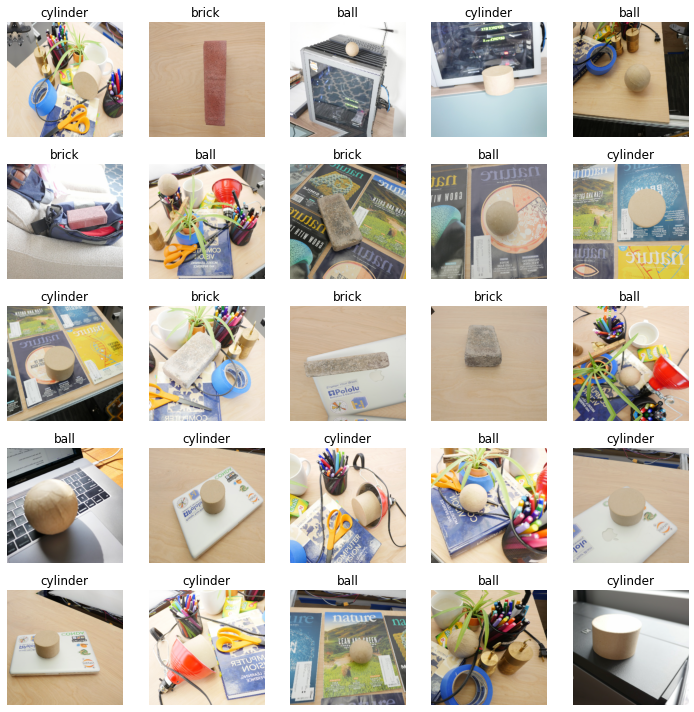

In [ ]:
data.show_batch(figsize=(10,10))

In [ ]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
lr=5e-3
learn.fit_one_cycle(4, slice(lr/10, lr))

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
lr=5e-5
learn.fit_one_cycle(8, slice(lr/10, lr))

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
interp.plot_top_losses(k=6, figsize=(12, 8))

In [ ]:
learn.export('/home/bbc-classifier.pkl') #Save Weights Locally

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
learn.export('/content/gdrive/My Drive/dsgo/bbc-classifier.pkl')